# Taxi Trip

**Proyek Akhir KASDD - Kelompok KASDEAD**

Carissa Almira Yudiva

2106751676

KASDAD-C

## Anggota Kelompok

- Carissa Almira Yudiva (2106751676)
- Fathirahma Alyssa Pristanti (2206082215)
- Muhammad Haekal Kalipaksi (2206817490)

# Package Installation

In [ ]:
%pip install pandas
%pip install numpy
%pip install scikit-learn==1.5.2
%pip install xgboost
%pip install catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Global Import

In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Load Train Datasets

In [ ]:
url  = "https://drive.google.com/uc?id=1wnDUJCke0araT3A7SAk8ZLTIbV00R3ev"
raw_df = pd.read_csv(url)

# Data Description

## Jumlah Baris dan Kolom

In [ ]:
print(f"Jumlah Baris: {raw_df.shape[0]}")
print(f"Jumlah Kolom: {raw_df.shape[1]}")

Jumlah Baris: 8000
Jumlah Kolom: 21


## Data Info

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  ehai

## Data Columns

In [ ]:
raw_df.columns

Index(['ID', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge', 'payment_type'],
      dtype='object')

Berikut ini adalah deskripsi kolom pada dataset:
- **VendorID**: Kode yang menunjukkan penyedia TPEP yang menyediakan catatan.
  - *1 = Creative Mobile Technologies, LLC*
  - *2 = VeriFone Inc*
- **lpep_pickup_datetime**: Tanggal dan waktu ketika meteran dinyalakan.
- **lpep_dropoff_datetime**: Tanggal dan waktu ketika meteran dimatikan.
- **store_and_fwd_flag**: Flag yang menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor.
  - *Y = perjalanan yang disimpan dan diteruskan*
  - *N = perjalanan yang tidak disimpan dan diteruskan*
- **RatecodeID**: Kode tarif akhir yang berlaku pada akhir perjalanan.
  - *1 = Tarif standar*
  - *2 = JFK*
  - *3 = Newark*
  - *4 = Nassau atau Westchester*
  - *5 = Tarif negosiasi*
  - *6 = Perjalanan grup*
- **PULocationID**: Zona Taksi TLC di mana meteran dinyalakan.
- **DOLocationID**: Zona Taksi TLC di mana meteran dimatikan.
- **passenger_count**: Jumlah penumpang di kendaraan. Ini adalah nilai yang dimasukkan oleh sopir.
- **trip_distance**: Jarak perjalanan yang telah dilalui dalam mil yang dilaporkan oleh meteran.
- **fare_amount**: Biaya waktu dan jarak yang dihitung oleh meteran.
- **extra**: Biaya tambahan dan surcharge (misalnya, biaya tambahan $0,50 dan $1 untuk jam sibuk dan malam hari).
- **mta_tax**: Pajak MTA sebesar 0,50 dolar yang otomatis dikenakan berdasarkan tarif meteran yang digunakan.
- **tip_amount**: Jumlah tip field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.
- **tolls_amount**: Jumlah total semua tol yang dibayar selama perjalanan.
- **improvement_surcharge**: Biaya perbaikan sebesar $0,30 yang dikenakan pada awal perjalanan. Biaya ini mulai diterapkan pada tahun 2015.
- **total_amount**: Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai).
- **payment_type**: Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.
  - *1 = Kartu kredit*
  - *2 = Tunai*
- **trip_type**: Jenis perjalanan.
  - *1 = Inner city*
  - *2 = Outer city*
- **congestion_surcharge**: Jumlah total yang dikumpulkan untuk surcharge kemacetan NYC selama perjalanan.

## Data Overview

In [ ]:
raw_df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,...,1.0,0.5,5.00,0.00,NaN,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,...,0.5,0.5,12.15,6.55,NaN,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,...,1.0,0.5,0.00,2.45,NaN,0.3,49.75,1.0,0.00,1.0


# Data Cleaning

## Duplicate Values

Sebelum melakukan proses training, kami ingin mengetahui apakah terdapat baris yang duplikat. Berikut adalah kode yang digunakan untuk menghitung jumlah duplikat.

In [ ]:
duplicated_raws = raw_df.duplicated()
num_duplicates = duplicated_raws.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Dari hasil run kode diatas, dapat dilihat bahwa tidak terdapat data yang duplikat. Oleh karena itu, kami tidak perlu melakukan penanganan data yang duplikat.

## Missing Values

Selanjutnya kami perlu memeriksa apakah terdapat kolom yang mengandung nilai null/NaN. Untuk menentukan apakah suatu kolom perlu dihapus, kami akan meninjau persentase nilai yang hilang (missing values) pada kolom tersebut. Jika persentasenya melebihi 50%, kolom tersebut akan kita hapus. Jika tidak, kita akan melakukan imputasi data. Berikut adalah kode untuk menampilkan persentase missing values

In [ ]:
MISSING_THRESHOLD = raw_df.shape[0] * 0.5

missing_counts = raw_df.isna().sum().sort_values(ascending=False)
present_counts = raw_df.notna().sum()
missing_percentage = (missing_counts / raw_df.shape[0] * 100).round(2)

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Present Values': present_counts,
    'Missing Percent': missing_percentage
})

missing_data_summary[missing_data_summary['Missing Values'] > MISSING_THRESHOLD]

,Missing Values,Present Values,Missing Percent
ehail_fee,8000,0,100.0


Setelah melakukan pengecekan, kami menemukan bahwa kolom `ehail_fee` memiliki missing values sebanyak 8000 baris (100%). Oleh karena itu, kami akan menghapus kolom tersebut dari data training.

In [ ]:
raw_df = raw_df.drop(columns=['ehail_fee'], axis=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  impr

Dari hasil eksekusi kode diatas, dapat dilihat bahwa untuk setiap kolom sudah tidak ada yang memiliki missing value.

# Data Exploration

## Faktor Yang Mempengaruhi Tarif Total Perjalanan

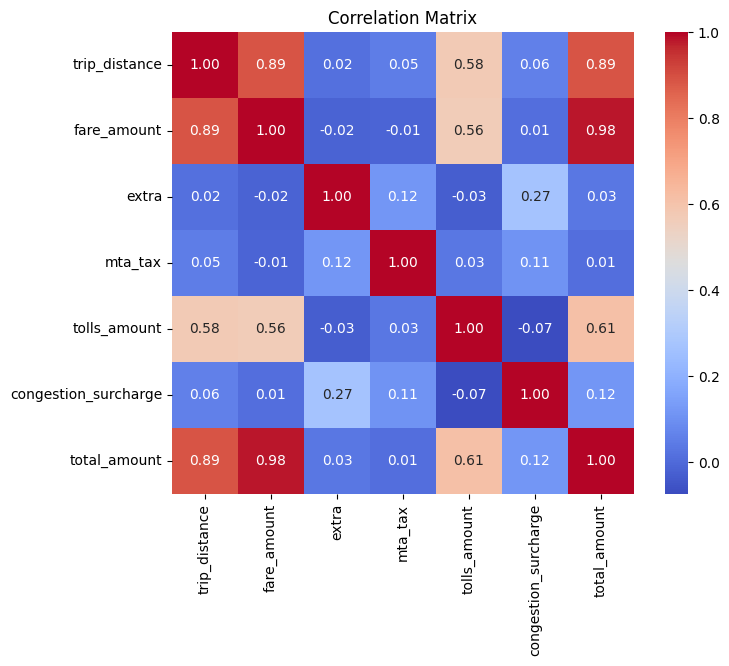

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


continuous_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'total_amount']
correlation_matrix = raw_df[continuous_columns].corr()

# melihat korelasi terhadap 'total_amount' untuk melihat faktor yang paling berpengaruh
correlation_with_total = correlation_matrix['total_amount'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

### Pertanyaan 1: Faktor apa yang mempengaruhi tarif total perjalanan? (cukup pertimbangkan atribut kontinu saja

Berdasarkan heatmap yang dibuat dari korelasi pearson, variabel `total_amount` memiliki korelasi (hubungan linear) yang sangat tinggi dengan variabel **trip_distance dan fare_amount**. Hal ini menunjukkan bahwa tarif dasar perjalanan dan jarak tempuh perjalanan merupakan faktor yang mempengaruhi tarif total perjalanan.

#### Hubungan Antara Jumlah Penumpang dan Jarak Perjalanan

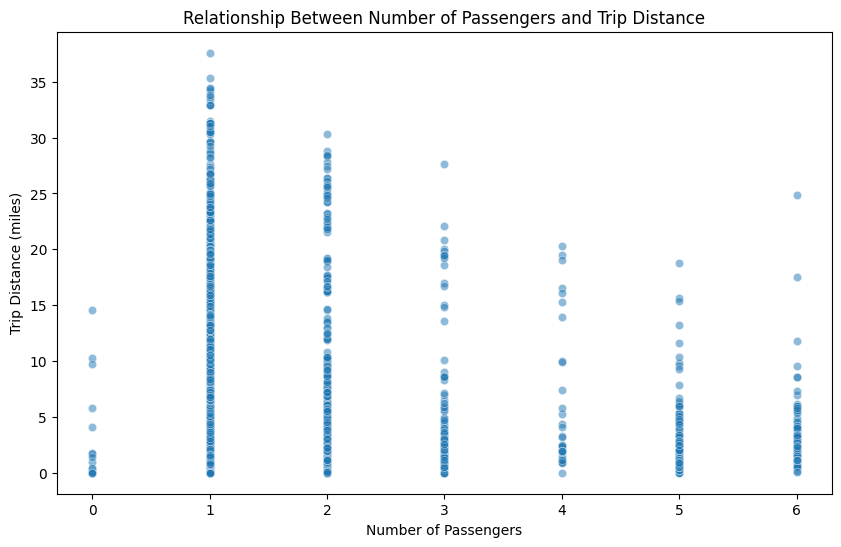

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='trip_distance', data=raw_df, alpha=0.5)
plt.title('Relationship Between Number of Passengers and Trip Distance')
plt.xlabel('Number of Passengers')
plt.ylabel('Trip Distance (miles)')
plt.show()

### Pertanyaan 2: Apakah terdapat hubungan antara jumlah penumpang dan jarak perjalanan

Berdasarkan grafik scatterplot di atas, dapat diketahui bahwa **tidak ada hubungan** yang signifikan antara jumlah penumpang dan jarak perjalana

## Waktu Tersibuk Perjalanan Taxi

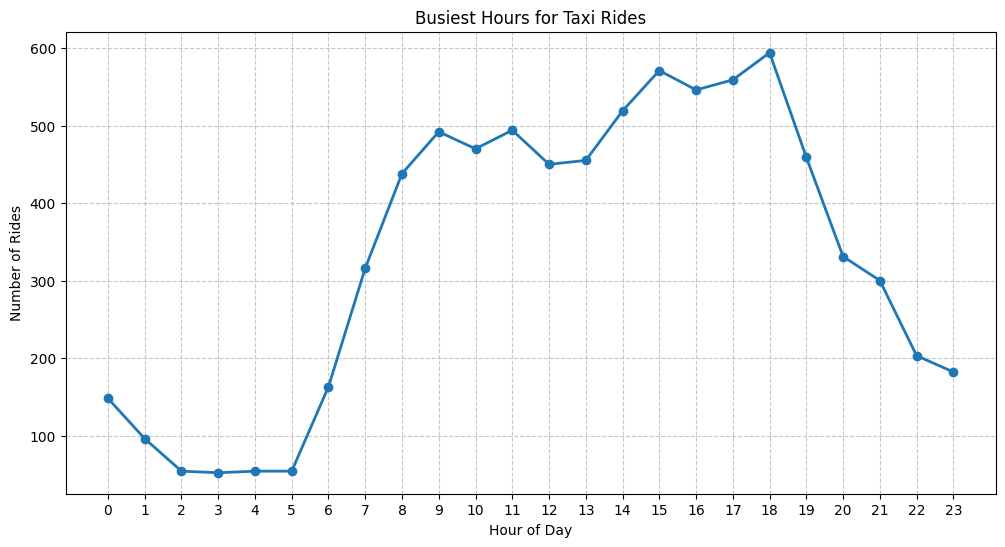

In [ ]:
raw_df['lpep_pickup_datetime'] = pd.to_datetime(raw_df['lpep_pickup_datetime'], errors='coerce')

explore_df = raw_df.copy()
explore_df['hour_of_day'] = explore_df['lpep_pickup_datetime'].dt.hour
hourly_counts = explore_df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2)

plt.title('Busiest Hours for Taxi Rides')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3: Kapan waktu tersibuk untuk perjalanan taksi

Berdasarkan grafik line chart di atas, dapat dilihat bahwa waktu tersibuk perjalanan taksi berada pada **pukul 18.00**, di mana mulai terjadi peningkatan jumlah perjalanan pada sore hari, mulai rentang waktu pukul 15.00 - 18.00. Hal ini dapat disebabkan karena pada rentang waktu tersebut merupakan **rush hour** yang bertepatan dengan jam pulang kerja

## Zona Pickup dengan Perjalanan Terbanyak

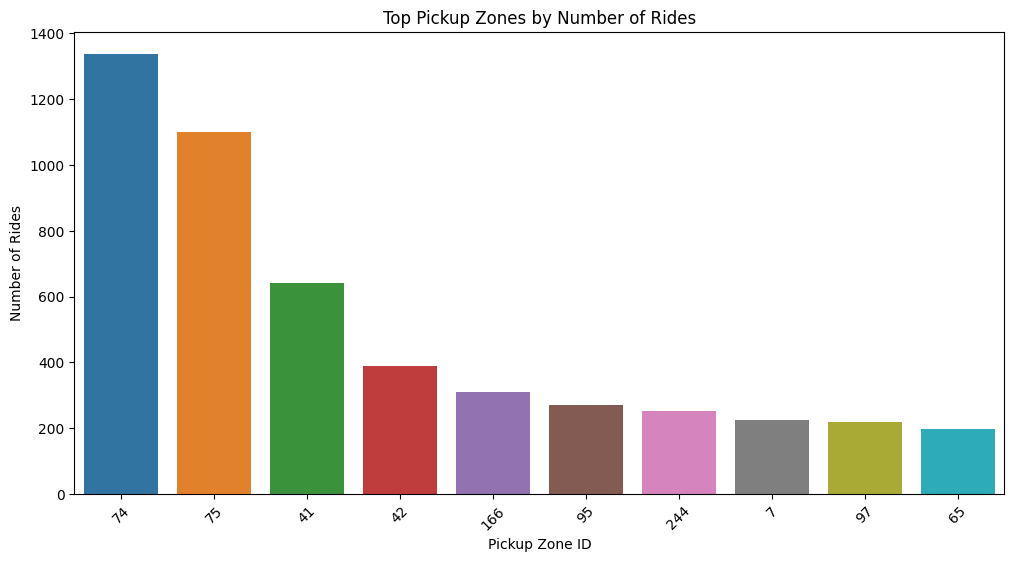

In [ ]:
top_pickup_zones = raw_df['PULocationID'].value_counts().head(10)
top_pickup_zones = top_pickup_zones.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index,
            y=top_pickup_zones.values,
            order=top_pickup_zones.index)
plt.title('Top Pickup Zones by Number of Rides')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: Zona pickup mana yang memiliki perjalanan terbanyak?

Berdasarkan grafik batang diatas, dapat dilihat bahwa **Zona dengan ID 74 memiliki jumlah perjalanan terbanyak**. Hal ini mengindikasikan bahwa zona tersebut merupakan pusat bisnis atau daerah ramai, seperti bandara atau termina

## Pengaruh Jarak Perjalanan pada Jumlah Tip (Eksplorasi Tambahan)

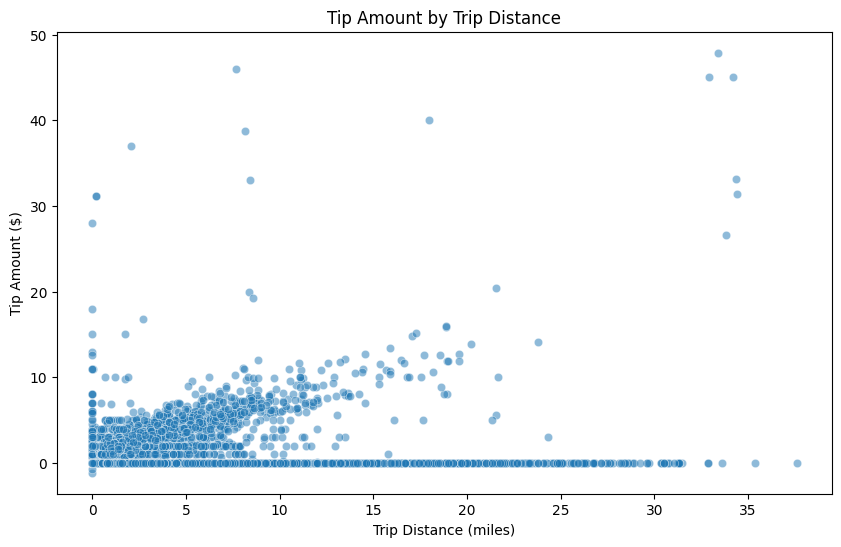

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

Scatter plot menunjukkan bahwa terdapat hubungan positif antara jarak perjalanan dan jumlah tip yang diberikan, di mana perjalanan dengan jarak yang lebih jauh cenderung mendapatkan tip yang lebih tinggi. Pada perjalanan pendek (0-5 mil), sebagian besar tip rendah atau tidak ada sama sekali, menunjukkan bahwa penumpang cenderung memberikan tip kecil atau tidak memberikan tip pada perjalanan singkat. Meskipun demikian, terdapat beberapa outlier dengan tip tinggi pada jarak perjalanan yang sangat jauh (lebih dari 25 mil), yang mungkin disebabkan oleh faktor lain seperti kualitas layanan. Secara keseluruhan, meskipun terdapat beberapa variasi, tip cenderung lebih tinggi pada perjalanan dengan jarak yang lebih jauh

## Jarak Perjalanan dan Waktu Hari pada Data Perjalanan Taksi (Eskplorasi Tambahan)

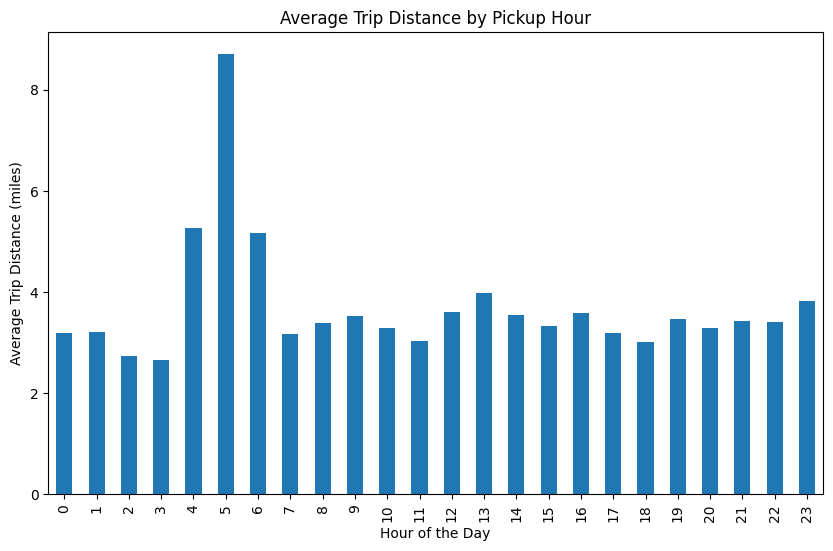

In [ ]:
raw_df['lpep_pickup_datetime'] = pd.to_datetime(raw_df['lpep_pickup_datetime'])
explore_df = raw_df.copy()
explore_df['pickup_hour'] = explore_df['lpep_pickup_datetime'].dt.hour

avg_trip_distance_by_hour = explore_df.groupby('pickup_hour')['trip_distance'].mean()

plt.figure(figsize=(10, 6))
avg_trip_distance_by_hour.plot(kind='bar')
plt.title('Average Trip Distance by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

Berdasarkan grafik di atas, jarak rata-rata perjalanan taksi menunjukkan puncak tertinggi pada pukul 5 pagi, dengan rata-rata jarak tempuh melebihi 8 mil. Hal ini mengindikasikan adanya perjalanan jarak jauh yang lebih umum dilakukan pada jam-jam awal pagi, kemungkinan untuk tujuan khusus seperti menuju bandara atau area di luar kota. Setelah pukul 5 pagi, jarak rata-rata kembali menurun dan stabil sepanjang hari, dengan sedikit peningkatan di beberapa jam, namun tetap berada di kisaran 2-5 mil.

# Clustering

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.cluster import KMeans # type: ignore
from sklearn.metrics import silhouette_score # type: ignore
from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
url = "https://drive.google.com/uc?id=1wnDUJCke0araT3A7SAk8ZLTIbV00R3ev"
df = pd.read_csv(url)

In [ ]:
df = df.drop(columns=['ehail_fee'], axis=1)

In [ ]:
# Encoding store_and_fwd_flag
label_encoder = LabelEncoder()

df["store_and_fwd_flag"] = label_encoder.fit_transform(df["store_and_fwd_flag"])

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.dayofweek
df['dropoff_month'] = df['dropoff_datetime'].dt.month

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 3600  # in hours
df['speed'] = df['trip_distance'] / df['trip_duration'].replace(0, np.nan)  # miles per hour
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance'].replace(0, np.nan)
df['fare_per_minute'] = df['fare_amount'] / (df['trip_duration'] * 60).replace(0, np.nan)
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
df['extra_charges'] = df['total_amount'] - df['fare_amount']

df['congestion_surcharge_percentage'] = (df['congestion_surcharge'] / df['total_amount']) * 100
df['fare_vs_tip_ratio'] = df['fare_amount'] / df['tip_amount'].replace(0, np.nan)
df['tolls_ratio'] = df['tolls_amount'] / df['total_amount'].replace(0, np.nan)
df['improvement_surcharge_percentage'] = (df['improvement_surcharge'] / df['total_amount']) * 100
df['hourly_fare_rate'] = df['fare_amount'] / (df['trip_duration'] / 60).replace(0, np.nan)
df['fare_distance_ratio'] = df['fare_amount'] / df['trip_distance'].replace(0, np.nan)
df['is_peak_hour'] = (df['pickup_hour'].isin(range(7, 10)) | df['pickup_hour'].isin(range(17, 20))).astype(int)
df['is_weekend'] = (df['pickup_day'].isin([5, 6])).astype(int)

In [ ]:
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Instead of removing, cap the values
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

numerical_columns = df.select_dtypes(include=[np.number]).columns
df = handle_outliers(df, numerical_columns)

In [ ]:
# Create peak_hour
df['peak_hour'] = 0
peak_hours = set(range(7, 10)).union(set(range(17, 20)))
df.loc[df['pickup_hour'].isin(peak_hours), 'peak_hour'] = 1

features = ['extra', 'trip_distance', 'peak_hour']
X = df[features]

In [ ]:
X = X.fillna(X.median())

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
n_clusters = 2

# Fit KMeans model
cluster_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_pred = cluster_model.fit_predict(X_scaled)

In [ ]:
cluster_pred = cluster_model.fit_predict(X_scaled)

# Add cluster labels to the data
data_with_clusters = pd.DataFrame(X_scaled, columns=features)
data_with_clusters['Cluster'] = cluster_pred

print("Cluster Assignments")
print(data_with_clusters['Cluster'].value_counts())

Cluster Assignments
Cluster
0    5142
1    2858
Name: count, dtype: int64


In [ ]:
Z = hierarchy.linkage(X_scaled, method='average', metric='euclidean')

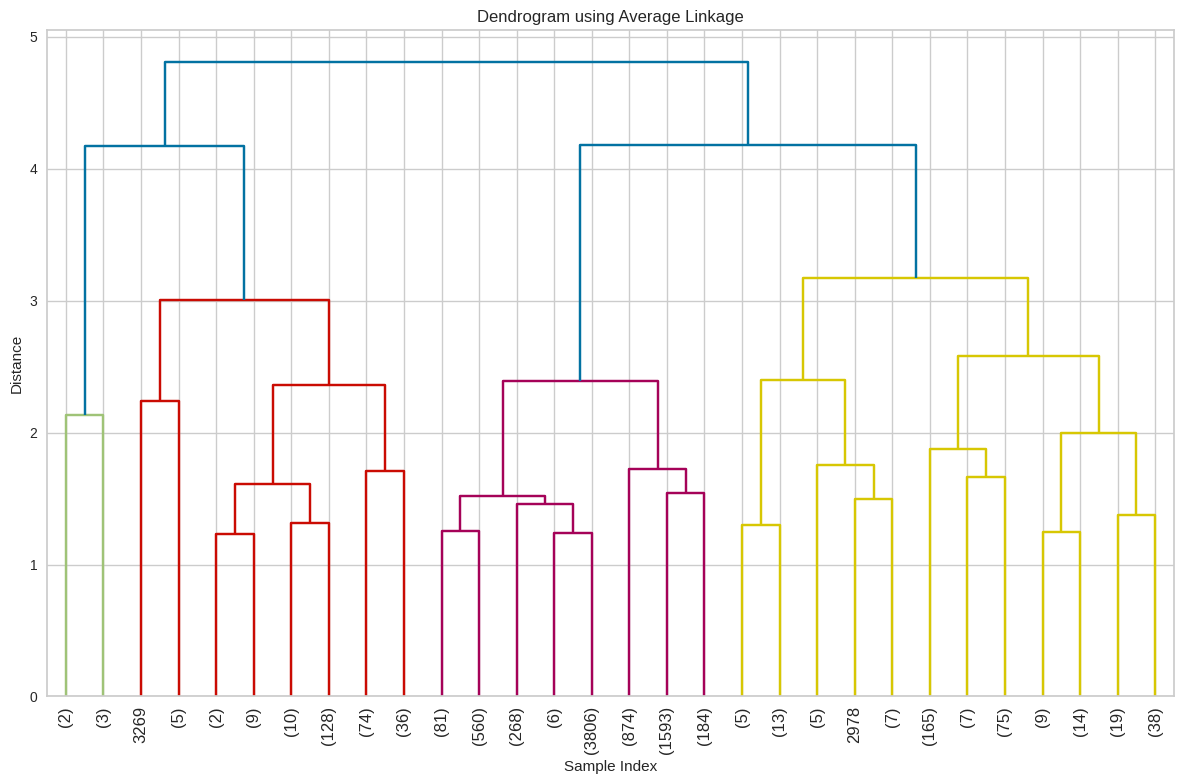

In [ ]:
plt.figure(figsize=(12, 8))
hierarchy.dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram using Average Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [ ]:
n_clusters = 3 # Adjust based on dendrogram
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels = clustering_model.fit_predict(X_scaled)

In [ ]:
df['Cluster'] = labels

In [ ]:
cluster_stats = df.groupby('Cluster').agg({
    'extra': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    'peak_hour': ['mean', 'std'],
}).round(2)

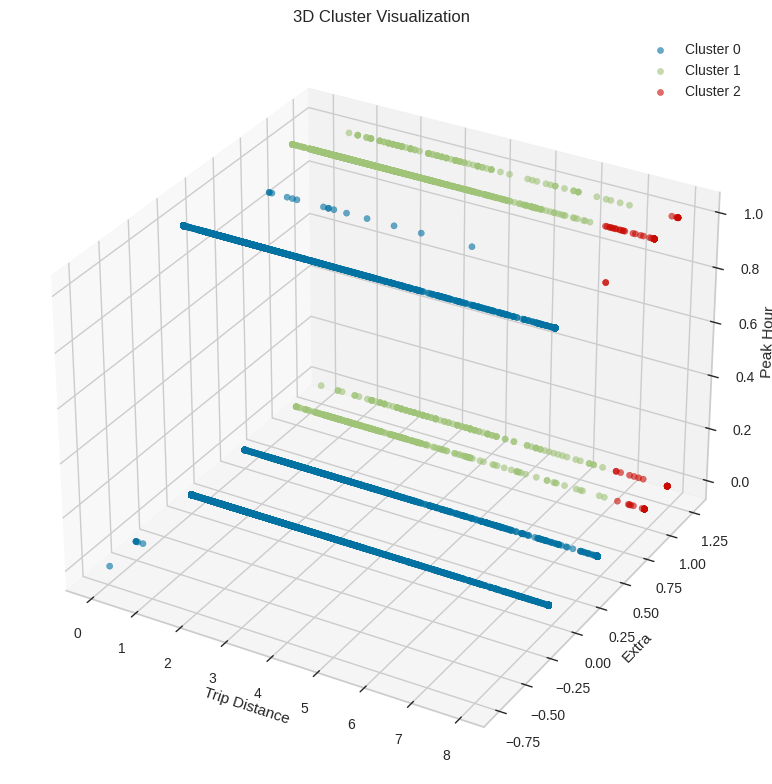

Cluster Characteristics:
        extra       trip_distance       peak_hour      
         mean   std          mean   std      mean   std
Cluster                                                
0        0.10  0.20          2.77  2.46      0.28  0.45
1        1.04  0.10          2.20  1.44      0.70  0.46
2        1.06  0.13          7.80  0.29      0.59  0.49


In [ ]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Features to visualize
x_feature = 'trip_distance'
y_feature = 'extra'
z_feature = 'peak_hour'

# Plot each cluster
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data[x_feature],
        cluster_data[y_feature],
        cluster_data[z_feature],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

# Set plot labels and title
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Extra')
ax.set_zlabel('Peak Hour')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.tight_layout()
plt.show()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_stats)

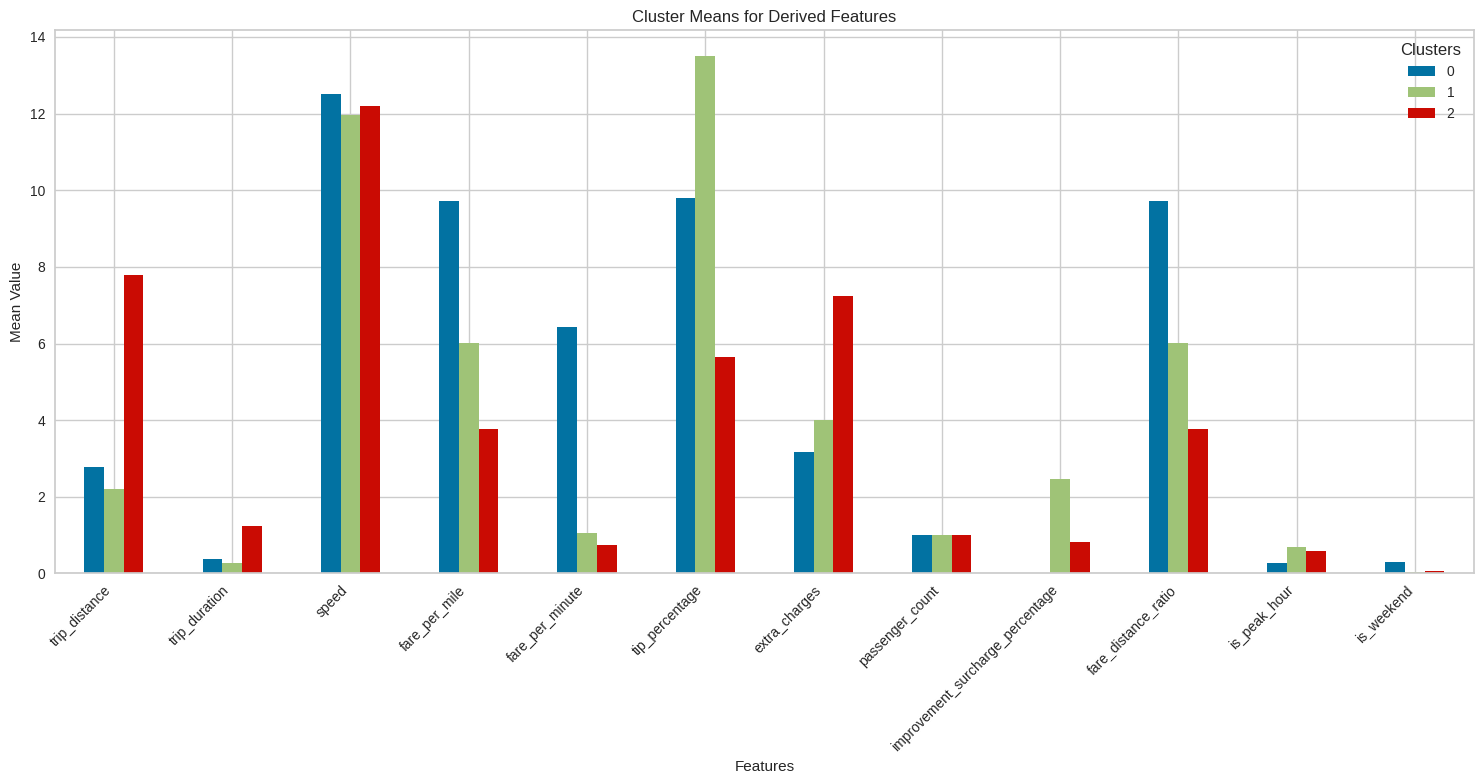


Detailed Cluster Characteristics:

Cluster 0:
trip_distance: 2.77
trip_duration: 0.37
speed: 12.52
fare_per_mile: 9.72
fare_per_minute: 6.43
tip_percentage: 9.80
extra_charges: 3.16
passenger_count: 1.00
improvement_surcharge_percentage: inf
fare_distance_ratio: 9.72
is_peak_hour: 0.28
is_weekend: 0.31

Cluster 1:
trip_distance: 2.20
trip_duration: 0.27
speed: 11.96
fare_per_mile: 6.01
fare_per_minute: 1.06
tip_percentage: 13.50
extra_charges: 4.01
passenger_count: 1.00
improvement_surcharge_percentage: 2.46
fare_distance_ratio: 6.01
is_peak_hour: 0.70
is_weekend: 0.04

Cluster 2:
trip_distance: 7.80
trip_duration: 1.23
speed: 12.21
fare_per_mile: 3.76
fare_per_minute: 0.75
tip_percentage: 5.65
extra_charges: 7.23
passenger_count: 1.00
improvement_surcharge_percentage: 0.83
fare_distance_ratio: 3.76
is_peak_hour: 0.59
is_weekend: 0.07


In [ ]:
features = [
    'trip_distance',
    'trip_duration',
    'speed',
    'fare_per_mile',
    'fare_per_minute',
    'tip_percentage',
    'extra_charges',
    'passenger_count',
    # 'congestion_surcharge_percentage',
    # 'fare_vs_tip_ratio',
    # 'tolls_ratio',
    'improvement_surcharge_percentage',
    'fare_distance_ratio',
    'is_peak_hour',
    'is_weekend'
]

# Group by clusters
cluster_means = df.groupby('Cluster')[features].mean()

# Plot cluster means
plt.figure(figsize=(15, 8))
cluster_means.T.plot(kind='bar', ax=plt.gca())
plt.title('Cluster Means for Derived Features')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Clusters')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Print detailed cluster characteristics
print("\nDetailed Cluster Characteristics:")
for cluster in cluster_means.index:
    print(f"\nCluster {cluster}:")
    for feature in features:
        mean_val = cluster_means.loc[cluster, feature]
        print(f"{feature}: {mean_val:.2f}")

Cluster 0: City Explorers

Mewakili perjalanan pendek dengan harga premium di dalam kota.
Pengaruh jam sibuk moderat, tetapi memiliki penggunaan signifikan pada akhir pekan.

Cluster 1: The Busy Commuter

Mewakili perjalanan pendek yang sering dilakukan pada jam sibuk, dengan perilaku memberi tip yang tinggi.
Penggunaan rendah pada akhir pekan, sesuai dengan pola perjalanan hari kerja.

Cluster 2: Traveler

Mewakili perjalanan jarak jauh dengan tarif per mil rendah dan biaya tambahan, kemungkinan menuju bandara atau antar kota.
Perilaku memberi tip yang rendah, mencerminkan fokus pada efisiensi biaya.

# Klasifikasi

Pada bagian ini, kami akan membangun model untuk memprediksi payment_type. Kolom payment_type pada dataset berisi informasi sebagai berikut:

- 1: Kartu Kredit
- 2: Cash

Oleh karena itu, kami akan melakukan klasifikasi menggunakan beberapa model. Berikut model yang akan kami gunakan:

- Random Forest
- Logistic Regression
- XGBoost
- CatBoost

## Clone Data

In [ ]:
df_classification = raw_df.copy()

## Klasifikasi Data Processing

### Validasi Data `payment_type`

Berdasarkan deskripsi data `payment_type`, payment_type hanya bisa berupa `1` atau `2`. Namun data `payment_type` yang berada di `train_taxi.csv` memiliki nilai selain `1` dan `2`. Berikut bukti terdapat nilai selain `1` dan `2` di `train_taxi.csv`.

In [ ]:
df_classification["payment_type"].unique()

array([1., 2., 3., 4.])

Berdasarkan output eskeskusi kode, ditemukan nilai selain 1 dan 2 pada kolom payment_type. Oleh karena itu, baris yang memiliki nilai payment_type selain 1 dan 2 akan kami hapus

In [ ]:
df_classification = df_classification[df_classification['payment_type'].isin([1,2])]

### Drop Kolom ID

In [ ]:
df_classification = df_classification.drop(columns=['ID'])

### Drop Kolom `lpep_pickup_datetime` and `lpep_dropoff_datetime`

Kedua kolom tersebut, yaitu `lpep_pickup_datetime` dan `lpep_dropoff_datetime`, memuat informasi waktu *pickup* dan waktu *dropoff* untuk setiap perjalanan taksi. Kami memutuskan untuk menghapus kedua kolom tersebut karena nilainya tidak bersifat numerik dan memiliki variasi nilai yang sangat banyak (disebabkan oleh format datetime). Mengingat banyaknya variasi nilai tersebut, proses encoding menjadi tidak praktis untuk diterapkan. Oleh karena itu, kami memutuskan untuk menghapus kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`.

In [ ]:
df_classification = df_classification.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)

### Membuat Features `is_give_tip_using_credit_card`

Setelah membaca deskripsi dataset, kami menemukan satu kolom yang menarik yaitu kolom `tip_amount`. Berikut adalah deskripsi dari kolom tersebut:

tip_amount: Jumlah tip – Field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.

Dengan deskripsi tersebut, kami mengambil suatu kesimpulan bahwa, jika kolom tip_amount lebih besar dari 0, maka kemungkinan besar payment_type adalah `Kredit Card`

Berikut adalah kode untuk membuat feature ini:

In [ ]:
df_classification['is_give_tip_using_credit_card'] = np.where(df_classification['tip_amount'] > 0, 1, 0)

### Encoding `payment_type`

Seperti yang sudah dijelaskan sebelumnya, `payment_type` adalah kolom yang memiliki nilai `1` dan `2`. Untuk menjadikannya masalah binary dan bukan multiclass, kami akan encode `payment_type` menjadi `0` dan `1`. Kami menyesuikan encode `payment_type` berdasarkan value `is_give_tip_using_credit_card`

In [ ]:
df_classification['payment_type'] = df_classification['payment_type'].replace({
    2: 0,
    1: 1
})

### Encoding `store_and_fwd_flag` - Label Encoder

Dikarenakan nilai kolom `store_and_fwd_flag` adalah `N` atau `Y`, kami harus melakukan encoding menjadi `0` atau `1`.

In [ ]:
from sklearn.preprocessing import LabelEncoder # type: ignore

label_encoder = LabelEncoder()
df_classification["store_and_fwd_flag"] = label_encoder.fit_transform(df_classification["store_and_fwd_flag"])

### Mengubah Tipe Data Kolom Kategorikal

Pada dataset, terdapat kolom kategorikal yang masih menggunakan float. Oleh karena itu, untuk kompatibilitas dengan model kami akan konversi ke int.

In [ ]:
df_classification['trip_type'] = df_classification['trip_type'].astype('int')
df_classification["RatecodeID"] = df_classification["RatecodeID"].astype('int')
df_classification["passenger_count"]  = df_classification["passenger_count"].astype('int')
df_classification["VendorID"] = df_classification["VendorID"].astype('int')

### Data Overview

In [ ]:
df_classification.apply(lambda x: x.unique())

VendorID                                                                    [2, 1]
store_and_fwd_flag                                                          [0, 1]
RatecodeID                                                         [1, 5, 2, 4, 3]
PULocationID                     [152, 93, 74, 226, 55, 75, 212, 82, 244, 41, 6...
DOLocationID                     [142, 107, 75, 129, 86, 263, 212, 226, 235, 74...
passenger_count                                              [1, 2, 3, 6, 5, 4, 0]
trip_distance                    [4.3, 13.52, 1.55, 1.22, 14.23, 1.2, 0.0, 2.34...
fare_amount                      [18.0, 38.0, 8.0, 45.5, 7.2, 25.0, 10.5, 7.0, ...
extra                                       [1.0, 0.5, 0.0, 3.75, 2.75, 3.25, 4.5]
mta_tax                                                                 [0.5, 0.0]
tip_amount                       [5.0, 12.15, 0.0, 1.0, 3.6, 2.51, 7.41, 6.11, ...
tolls_amount                     [0.0, 6.55, 2.45, 6.12, 3.0, 13.75, 9.0, 13.1,...
impr

In [ ]:
df_classification.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type,is_give_tip_using_credit_card
0,2,0,1,152,142,1,4.30,18.0,1.0,0.5,5.00,0.00,0.3,27.55,1,2.75,1.0,1
1,2,0,1,93,107,2,13.52,38.0,0.5,0.5,12.15,6.55,0.3,60.75,1,2.75,1.0,1
2,2,0,1,74,75,1,1.55,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1,0.00,0.0,0
3,2,0,1,226,129,1,1.22,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1,0.00,0.0,0
4,2,0,1,55,86,1,14.23,45.5,1.0,0.5,0.00,2.45,0.3,49.75,1,0.00,1.0,0


## Modeling

### Random Forest With Hyperparameter Tuning

In [ ]:
X_rf = df_classification.drop(columns=['payment_type'], axis=1)
y_rf = df_classification['payment_type']

In [ ]:
from sklearn.model_selection import train_test_split #type: ignore
from sklearn.ensemble import RandomForestClassifier #type: ignore
from sklearn.model_selection import GridSearchCV #type: ignore

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200],  # reduced from [500, 1000]
    'max_depth': [15],      # reduced from [15, 20]
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']  # reduced from ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1, scoring='f1')

In [ ]:
# grid_search.fit(X_rf_train, y_rf_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200]},
             scoring='f1', verbose=1)

In [ ]:
# best_params = grid_search.best_params_
# print(best_params)

# best_model = grid_search.best_estimator_
# print(best_model)

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)


In [ ]:
rf_params = {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **rf_params)
rf_model.fit(X_rf_train, y_rf_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_rf_pred = rf_model.predict(X_rf_test)

In [ ]:
rf_result = classification_metrics(y_rf_test, y_rf_pred)
rf_result

,Metric,Value
0,Accuracy,0.928796
1,Precision,0.977887
2,Recall,0.893378
3,F1-Score,0.933724
4,TP,796.000000
5,TN,678.000000
6,FP,18.000000
7,FN,95.000000


# Regresi

Pada bagian ini, kami akan melakukan prediksi untuk kolom `trip_distance`. Kolom `trip_distance` merupakan kolom yang bersifat numerik dan kontinu. Oleh karena itu, kami akan melakukan regresi untuk memprediksi kolom tersebut.

Berikut adalah model regresi yang akan kami gunakan untuk melakukan prediksi kolom `trip_distance`:

- XGBoost No Hypertuning
- XGBoost Hypertuning
- CatBoost No Hypertuning

## Regresi Data Processing

### Clone Data

In [ ]:
df_regression = raw_df.copy()

### Validasi Data `payment_type`

Berdasarkan deskripsi data `payment_type`, payment_type hanya bisa berupa `1` atau `2`. Namun data `payment_type` yang berada di `train_taxi.csv` memiliki nilai selain `1` dan `2`. Berikut bukti terdapat nilai selain `1` dan `2` di `train_taxi.csv`.

In [ ]:
df_regression["payment_type"].unique()

array([1., 2., 3., 4.])

Berdasarkan output eskeskusi kode, ditemukan nilai selain 1 dan 2 pada kolom payment_type. Oleh karena itu, baris yang memiliki nilai payment_type selain 1 dan 2 akan kami hapus

In [ ]:
df_regression = df_regression[df_regression['payment_type'].isin([1,2])]

### Drop Kolom ID

In [ ]:
df_regression = df_regression.drop(columns=['ID'])

### Encoding `store_and_fwd_flag` - Label Encoder

Dikarenakan nilai kolom `store_and_fwd_flag` adalah `N` atau `Y`, kami harus melakukan encoding menjadi `0` atau `1`.

In [ ]:
from sklearn.preprocessing import LabelEncoder # type: ignore

label_encoder = LabelEncoder()
df_regression["store_and_fwd_flag"] = label_encoder.fit_transform(df_regression["store_and_fwd_flag"])

### Encoding untuk kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`


Kolom lpep_pickup_datetime dan lpep_dropoff_datetime berisi informasi waktu penjemputan dan pengantaran untuk setiap perjalanan taksi. Berdasarkan analisis yang kami lakukan, kedua kolom tersebut dapat dimanfaatkan untuk mengekstraksi data:

- Durasi perjalanan (trip duration)
- Jam penjemputan (pickup hour)
- Hari penjemputan (pickup day)
- Bulan penjemputan (pickup month)

Dari data-data tersebut, kami akan melakukan encoding ulang. Berikut adalah metode encoding yang akan kami gunakan:

- Jam penjemputan: cylinical encoding
- Bulan Penjemputan: cylindrical encoding
- Hari penjuemputan: One-hot encoding


#### Mendapatkan kolom pickup_day, dropoff_day, pickup_month, dropoff_month

In [ ]:
df_regression['pickup_datetime'] = pd.to_datetime(df_regression['lpep_pickup_datetime'])
df_regression['dropoff_datetime'] = pd.to_datetime(df_regression['lpep_dropoff_datetime'])

df_regression['pickup_hour'] = df_regression['pickup_datetime'].dt.hour
df_regression['pickup_day'] = df_regression['pickup_datetime'].dt.dayofweek
df_regression['pickup_month'] = df_regression['pickup_datetime'].dt.month
df_regression['dropoff_hour'] = df_regression['dropoff_datetime'].dt.hour
df_regression['dropoff_day'] = df_regression['dropoff_datetime'].dt.dayofweek
df_regression['dropoff_month'] = df_regression['dropoff_datetime'].dt.month

#### Mendapatkan trip_duration

In [ ]:
df_regression['trip_duration'] = (df_regression['dropoff_datetime'] - df_regression['pickup_datetime']).dt.total_seconds() / 60

#### Cylinical Encoding

In [ ]:
def encode_cyclical(feature, max_val):
    df_regression[f'{feature}_sin'] = np.sin(2 * np.pi * df_regression[feature] / max_val)
    df_regression[f'{feature}_cos'] = np.cos(2 * np.pi * df_regression[feature] / max_val)

encode_cyclical('pickup_hour', 24)
encode_cyclical('dropoff_hour', 24)
encode_cyclical('pickup_month', 12)
encode_cyclical('dropoff_month', 12)

#### Drop kolom waktu yang tidak diperlukan

Setelah encoding menjadi cyclical encoding, setiap kolom tersebut (jam, hari, dan bulan) akan menghasilkan dua kolom numerik baru yang merepresentasikan nilai sinus (sin) dan kosinus (cos) dari fitur waktu tersebut. Kedua kolom hasil transformasi (sin dan cos) inilah yang akan kita gunakan selanjutnya. Kolom waktu awal (lpep_pickup_datetime dan lpep_dropoff_datetime) beserta kolom hasil ekstraksi fitur (jam, hari, bulan) akan dihapus karena tidak lagi diperlukan.

In [ ]:
df_regression = df_regression.drop(columns=['pickup_hour', 'pickup_month', 'dropoff_hour', 'dropoff_month', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'dropoff_datetime'], axis=1)

#### One Hot Encoding untuk `pickup_day` dan `dropoff_day`

In [ ]:
pickup_day_one_hot = pd.get_dummies(df_regression['pickup_day'], prefix='pickup_day', drop_first=True).astype(int)
dropoff_day_one_hot = pd.get_dummies(df_regression['dropoff_day'], prefix='dropoff_day', drop_first=True).astype(int)
df_regression = pd.concat([df_regression, pickup_day_one_hot, dropoff_day_one_hot], axis=1)

In [ ]:
df_regression = df_regression.drop(columns=['pickup_day', 'dropoff_day'], axis=1)

### Data Overview

In [ ]:
df_regression.apply(lambda x: x.unique())

VendorID                                                        [2.0, 1.0]
store_and_fwd_flag                                                  [0, 1]
RatecodeID                                       [1.0, 5.0, 2.0, 4.0, 3.0]
PULocationID             [152, 93, 74, 226, 55, 75, 212, 82, 244, 41, 6...
DOLocationID             [142, 107, 75, 129, 86, 263, 212, 226, 235, 74...
passenger_count                        [1.0, 2.0, 3.0, 6.0, 5.0, 4.0, 0.0]
trip_distance            [4.3, 13.52, 1.55, 1.22, 14.23, 1.2, 0.0, 2.34...
fare_amount              [18.0, 38.0, 8.0, 45.5, 7.2, 25.0, 10.5, 7.0, ...
extra                               [1.0, 0.5, 0.0, 3.75, 2.75, 3.25, 4.5]
mta_tax                                                         [0.5, 0.0]
tip_amount               [5.0, 12.15, 0.0, 1.0, 3.6, 2.51, 7.41, 6.11, ...
tolls_amount             [0.0, 6.55, 2.45, 6.12, 3.0, 13.75, 9.0, 13.1,...
improvement_surcharge                                           [0.3, 0.0]
total_amount             

In [ ]:
df_regression.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,pickup_day_3,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_1,dropoff_day_2,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
0,2.0,0,1.0,152,142,1.0,4.30,18.0,1.0,0.5,...,0,1,0,0,0,0,0,1,0,0
1,2.0,0,1.0,93,107,2.0,13.52,38.0,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0,1.0,74,75,1.0,1.55,8.0,0.0,0.5,...,0,0,0,0,0,1,0,0,0,0
3,2.0,0,1.0,226,129,1.0,1.22,8.0,0.0,0.5,...,0,0,0,0,1,0,0,0,0,0
4,2.0,0,1.0,55,86,1.0,14.23,45.5,1.0,0.5,...,1,0,0,0,0,0,1,0,0,0


## Modeling

### Fungsi untuk mendapatkan metrics dari model regresi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #type: ignore

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics_df = pd.DataFrame({'mae': [mae], 'mse': [mse], 'rmse': [rmse], 'r2': [r2]})
    melted_df = pd.melt(metrics_df, var_name="Metrics name", value_name="Value")
    return melted_df

### XGBoost Non Hypertuning

In [ ]:
## Import Dependencies
import xgboost as xgb # type: ignore
from sklearn.model_selection import train_test_split #type: ignore

In [ ]:
X_xgb = df_regression.drop(columns='trip_distance', axis=1)
y_xgb = df_regression['trip_distance']

In [ ]:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [ ]:
model_xgb = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=2000,
        max_depth=9,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )

model_xgb.fit(X_xgb_train, y_xgb_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_xgb_pred = model_xgb.predict(X_xgb_test)

In [ ]:
xgb_result = get_metrics(y_xgb_test, y_xgb_pred)
xgb_result

,Metrics name,Value
0,mae,0.335310
1,mse,0.638634
2,rmse,0.799146
3,r2,0.964930
